In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
images_fn = ['StLouisArchMultExpEV+4.09.jpeg', 'StLouisArchMultExpEV+1.51.jpeg', 'StLouisArchMultExpEV-1.82.JPG', 'StLouisArchMultExpEV-4.72.jpeg']
img_list = [cv.imread(fn) for fn in images_fn]

exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

In [3]:
merge_debevec = cv.createMergeDebevec()
hdr_debevec = merge_debevec.process(img_list, times = exposure_times.copy())
merge_robertson = cv.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times = exposure_times.copy())

In [4]:
# Tonemap HDR image
tonemap1 = cv.createTonemapDurand(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())
tonemap2 = cv.createTonemapDurand(gamma=1.3)
res_robertson = tonemap2.process(hdr_robertson.copy())

In [5]:
# Exposure fusion using Mertens
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

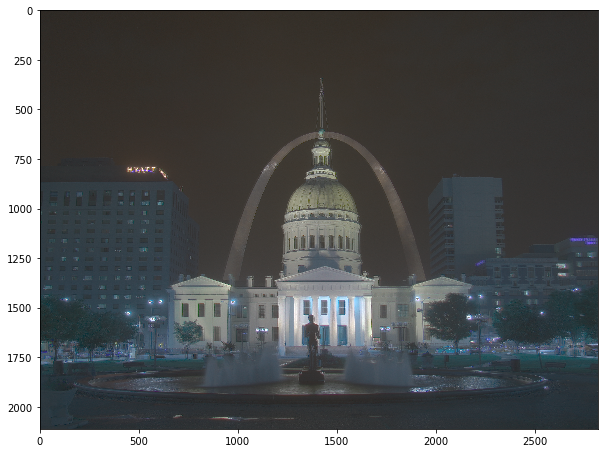

In [6]:
# Convert datatype to 8-bit and save
res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
plt.figure(figsize = (10, 12))
plt.imshow(res_debevec_8bit)

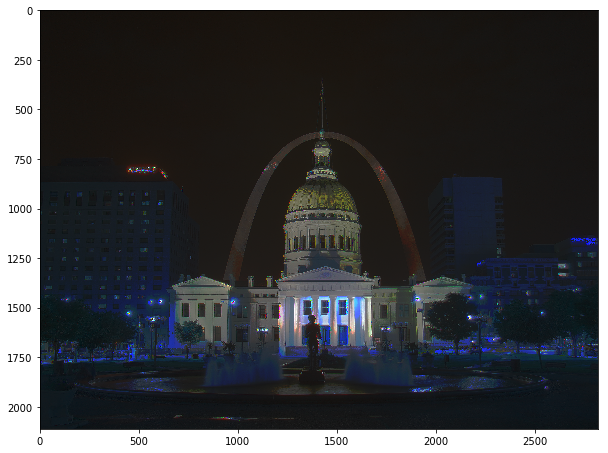

In [7]:
plt.figure(figsize = (10, 12))
plt.imshow(res_robertson_8bit)

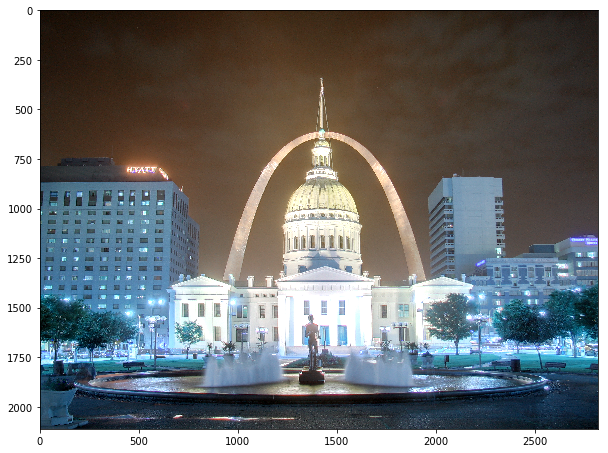

In [8]:
plt.figure(figsize = (10, 12))
plt.imshow(res_mertens_8bit)

In [9]:
# Estimate camera response function (CRF)
cal_debevec = cv.createCalibrateDebevec()
crf_debevec = cal_debevec.process(img_list, times=exposure_times)
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy(), response=crf_debevec.copy())
cal_robertson = cv.createCalibrateRobertson()
crf_robertson = cal_robertson.process(img_list, times=exposure_times)
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy(), response=crf_robertson.copy())

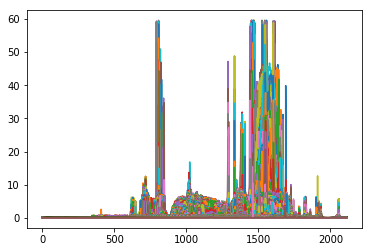

In [19]:
plt.plot(hdr_debevec[:,:,0])
plt.show()

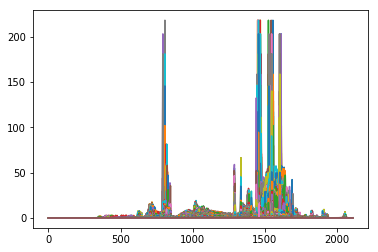

In [18]:
plt.plot(hdr_robertson[:,:,0])
plt.show()

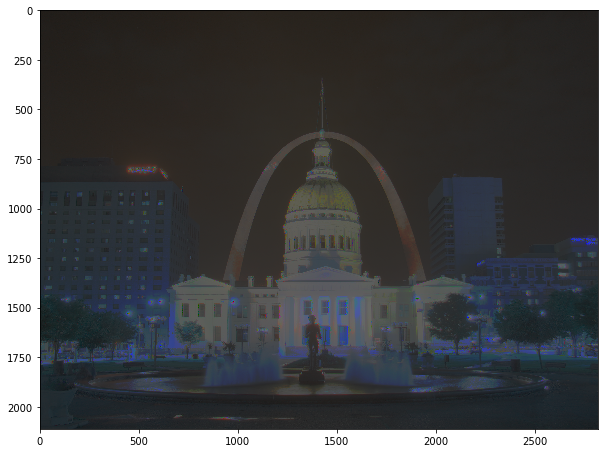

In [16]:
merge_debevec = cv.createMergeRobertson()
hdr_debevec = merge_debevec.process(img_list, times = exposure_times.copy())

tonemap1 = cv.createTonemapDrago(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())

res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')
plt.figure(figsize = (10, 12))
plt.imshow(res_debevec_8bit)